## Filter Bank examples

First, let's do a 3 band filter bank.  We will generate colored noise (to be able to track see the evolution of the psd's (power spectral densities) and then decimate).

Let's suppose, in a first phase that the Sampling Frequency is 1000 Hz

### Generate a signal

/home/romain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0,0.5,' DSP')

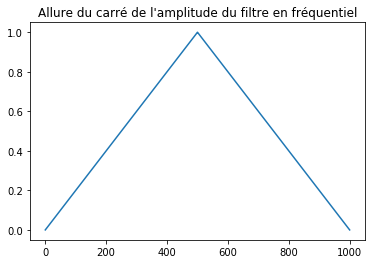

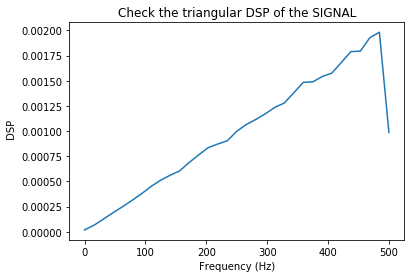

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.signal as signal
from scipy.fftpack import fft, ifft



Fs=1000.0
to=0.0
tmax=100.0
Ts=1.0/Fs
t=np.arange(to,tmax,Ts)
SIG = np.random.normal(0,1,t.size)
SIGF=fft(SIG)                 # Put in frequency domain (dumb manner to do this)
FILT=np.sqrt(np.concatenate((np.linspace(0,1,(t.size/2)) ,np.linspace(1,0,(t.size/2)))))
                              # Create the filter in the frequency domain
plt.plot(np.linspace(0,Fs,(t.size)),FILT**2) 
plt.title('Allure du carré de l\'amplitude du filtre en fréquentiel')
                              # This is how it looks like (between 0 and Fs)
SIGF=SIGF*FILT                # filter in the frequency domain
SIG=np.real(ifft(SIGF))
f, Pss_den = signal.welch(SIG, Fs,nperseg=64)
                            # compute the power spectral density with the Welch Method
plt.figure()
plt.plot(f[0:f.size:],Pss_den[0:f.size:])
                            # plot the square root of the psd (between 0 and Fs/2)
plt.title('Check the triangular DSP of the SIGNAL')
plt.xlabel('Frequency (Hz)')
plt.ylabel(' DSP')

### Filter bank  design (3 FIRs)


/home/romain/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


Text(0,0.5,'Amplitude (in dB) ')

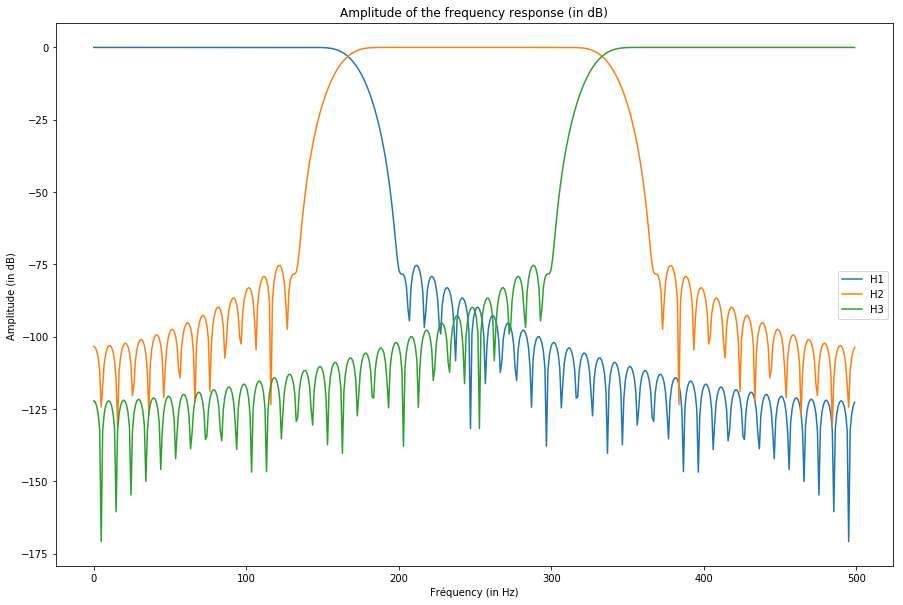

In [6]:

# setup of the three filters (divide the band in 3 equal bands)

numtaps=101
delta=5
f1=Fs/2/3
f2=Fs/3
h1 = signal.firwin(numtaps, f1+delta, window='blackman',pass_zero=True,scale=False, nyq=0.5*Fs)
h2 = signal.firwin(numtaps, [f1-delta,f2+delta], window='blackman',pass_zero=False,scale=False, nyq=0.5*Fs)
h3 = signal.firwin(numtaps, f2-delta, window='blackman',pass_zero=False,scale=False, nyq=0.5*Fs)
w1, H1 = signal.freqz(h1)
w2, H2 = signal.freqz(h2)
w3, H3 = signal.freqz(h3)
axes=[0, Fs/2, -120, 3]
plt.figure(figsize = (15, 10))
plt.plot(w1/(2*np.pi)*Fs, 20*np.log10(np.abs(H1)))
plt.plot(w2/(2*np.pi)*Fs, 20*np.log10(np.abs(H2)))
plt.plot(w3/(2*np.pi)*Fs, 20*np.log10(np.abs(H3)))

plt.legend(['H1','H2','H3'])
plt.title('Amplitude of the frequency response (in dB)')
plt.xlabel('Fréquency (in Hz)')
plt.ylabel('Amplitude (in dB) ')



### Plain Filtering



Text(0,0.5,'Dsp (in dB) ')

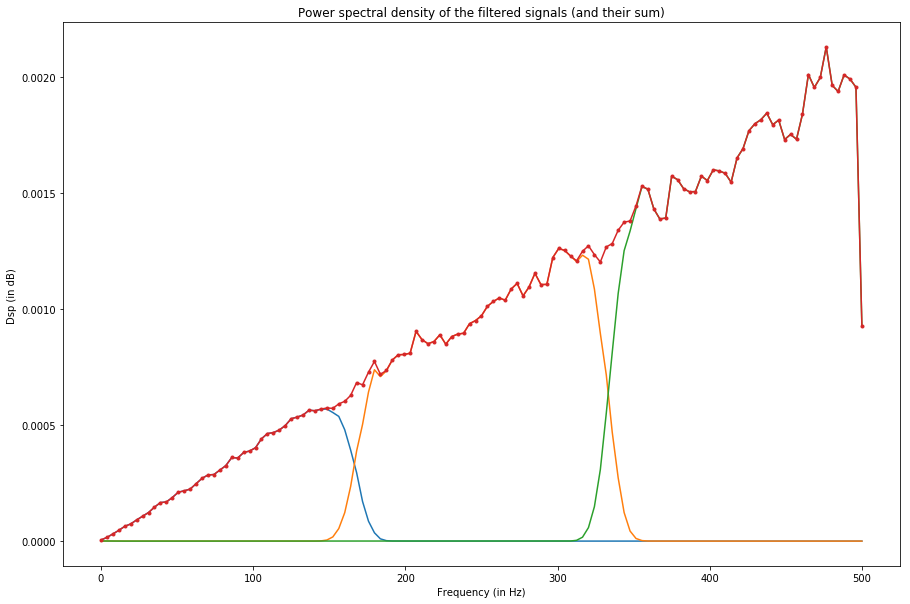

In [14]:
# convolve the signal with the three filters

SIG1=np.convolve(h1,SIG)                        # filter with H1
SIG1=SIG1[numtaps//2:SIG.size+numtaps//2]       # skip the beginning of filtered signal
SIG2=np.convolve(h2,SIG)                        # filter with H2
SIG2=SIG2[numtaps//2:SIG.size+numtaps//2]       # skip the beginning of filtered signal
SIG3=np.convolve(h3,SIG)                        # filter with H2
SIG3=SIG3[numtaps//2:SIG.size+numtaps//2]       # skip the beginning of filtered signal

# plot the Power Spectral S
plt.figure(figsize = (15, 10))
seg_length=256
axes=[0, Fs/2, 0, 0.0021]

f, Pss_den1 = signal.welch(SIG1, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.plot(f,Pss_den1)        # plot the  psd (between 0 and Fs/2)
f, Pss_den2 = signal.welch(SIG2, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.plot(f,Pss_den2)        # plot the the psd (between 0 and Fs/2)
f, Pss_den3 = signal.welch(SIG3, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.plot(f,Pss_den3)        # plot the the psd (between 0 and Fs/2)
plt.plot(f,Pss_den3+Pss_den1+Pss_den2,'.-')        # plot the the psd of the sum (between 0 and Fs/2)
 

plt.title('Power spectral density of the filtered signals (and their sum)')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')

### check the continuous time signal

This part of the code is only to "check" the pseudo-continuous time signal (10 times more samples)

/home/romain/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/romain/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/romain/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2233: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interprete

Text(0,0.5,'Dsp (in dB) ')

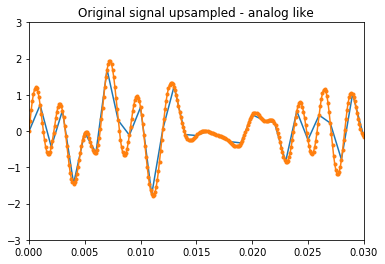

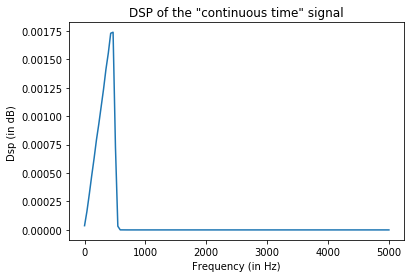

In [15]:
up_analog=10                                             # Set the upsampling to 10
SIG_analog= signal.resample(SIG, up_analog*SIG.size)     # Resample (upsample then filter)
tup=np.arange(to,tmax,Ts/up_analog)                      # check the "new" time vector
plt.plot(t,SIG)
plt.plot(tup,SIG_analog,'.-')

plt.title('Original signal upsampled - analog like')
plt.axis([0, 0.03, -3, 3])


f, Pss_dena = signal.welch(SIG_analog, Fs*up_analog,nperseg=seg_length)
plt.figure()
plt.plot(f,Pss_dena)
plt.title('DSP of the "continuous time" signal')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')

### Downsample the 3 signals

This part only downsamples the signals and shows that :
<li> The psd is divided by 3
<li> The psd of odd $k$ (here $k=1$) is reverted in frequency (see theory)


Text(0,0.5,'Dsp (in dB) ')

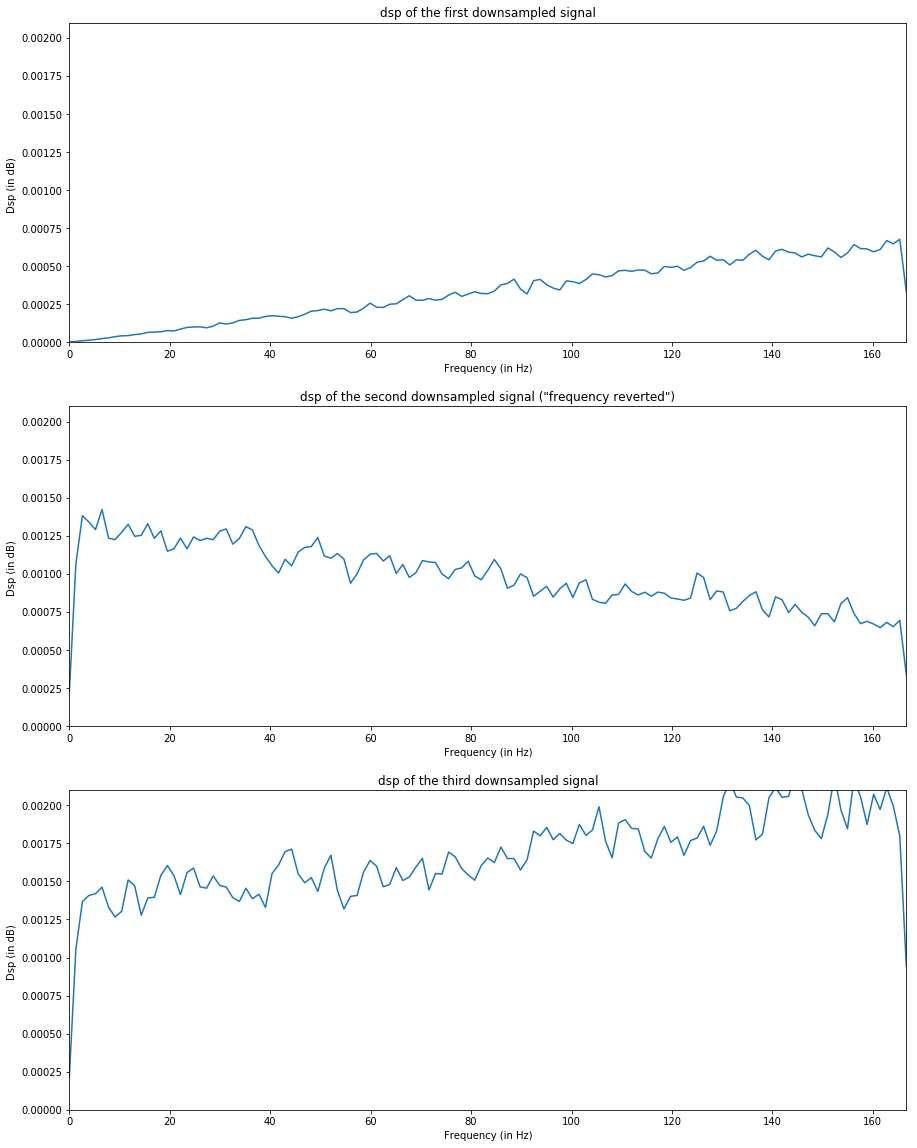

In [20]:
SIG1d=SIG1[0::3]                           # Downsample (is take one sample out of  3)
SIG2d=SIG2[0::3]
SIG3d=SIG3[0::3]
plt.figure(figsize = (15, 20))
seg_length=256
axes=[0, Fs/2/3, 0, 0.0021]

f, Pss_dend1 = signal.welch(SIG1d, Fs/3,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.subplot(311)
plt.plot(f,Pss_dend1)
plt.axis(axes)
plt.title('dsp of the first downsampled signal')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')


                            # plot the square root of the psd (between 0 and Fs/2)
f, Pss_dend2 = signal.welch(SIG2d, Fs/3,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.subplot(312)
plt.plot(f,Pss_dend2)
plt.axis(axes)
plt.title('dsp of the second downsampled signal ("frequency reverted")')

plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')

                            # plot the square root of the psd (between 0 and Fs/2)
f, Pss_dend3 = signal.welch(SIG3d, Fs/3,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.subplot(313)
plt.title('dsp of the third downsampled signal')

plt.plot(f,Pss_dend3)
plt.axis(axes)

                            # plot the square root of the psd (between 0 and Fs/2)

plt.axis(axes)
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')

### Upsample the 3 signals

Upsample and multiply by 3 (to counter the division by three in the previous step).  The dsp's are shown and it is consistent with theory.


[0, 500.0, 0, 0.0021]

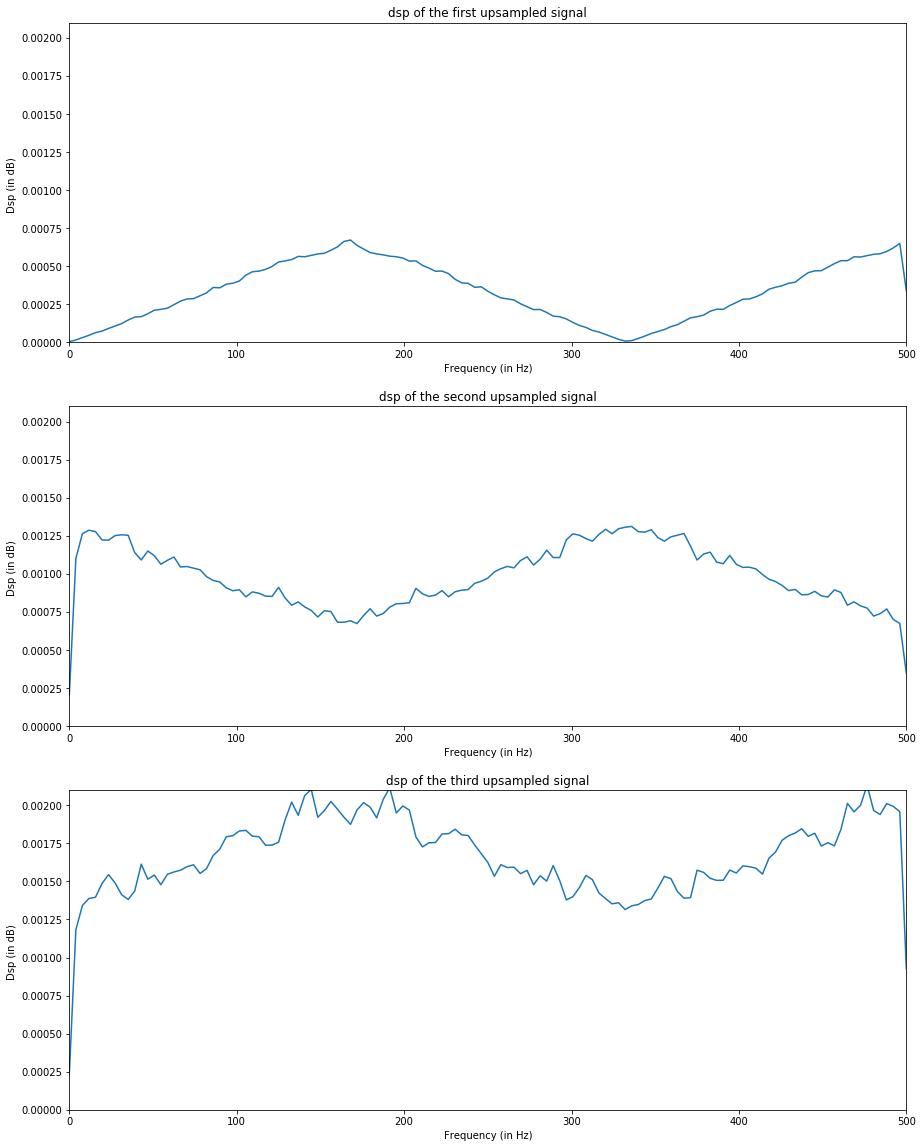

In [21]:
SIG1u=np.zeros(SIG1.shape)
SIG2u=np.zeros(SIG1.shape)
SIG3u=np.zeros(SIG1.shape)
SIG1u[0::3]=3*SIG1d
SIG2u[0::3]=3*SIG2d
SIG3u[0::3]=3*SIG3d
plt.figure(figsize = (15, 20))
seg_length=256
axes=[0, Fs/2, 0, 0.0021]

f, Pss_denu1 = signal.welch(SIG1u, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.subplot(311)
plt.plot(f,Pss_denu1)
plt.axis(axes)
plt.title('dsp of the first upsampled signal')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')



                            # plot the square root of the psd (between 0 and Fs/2)
f, Pss_denu2 = signal.welch(SIG2u, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.subplot(312)
plt.plot(f,Pss_denu2)
plt.axis(axes)
plt.title('dsp of the second upsampled signal')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')

                            # plot the square root of the psd (between 0 and Fs/2)
f, Pss_denu3 = signal.welch(SIG3u, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.subplot(313)
plt.plot(f,Pss_denu3)
plt.title('dsp of the third upsampled signal')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')

plt.axis(axes)

                            # plot the square root of the psd (between 0 and Fs/2)

plt.axis(axes)


### Filter the upsampled signals and add them up

Plainly filter the upsampled signals and add them up.  You can see "glitches" at the edges of the bands : the reconstruction suffers from aliasing at the edges.

Text(0,0.5,'Dsp (in dB) ')

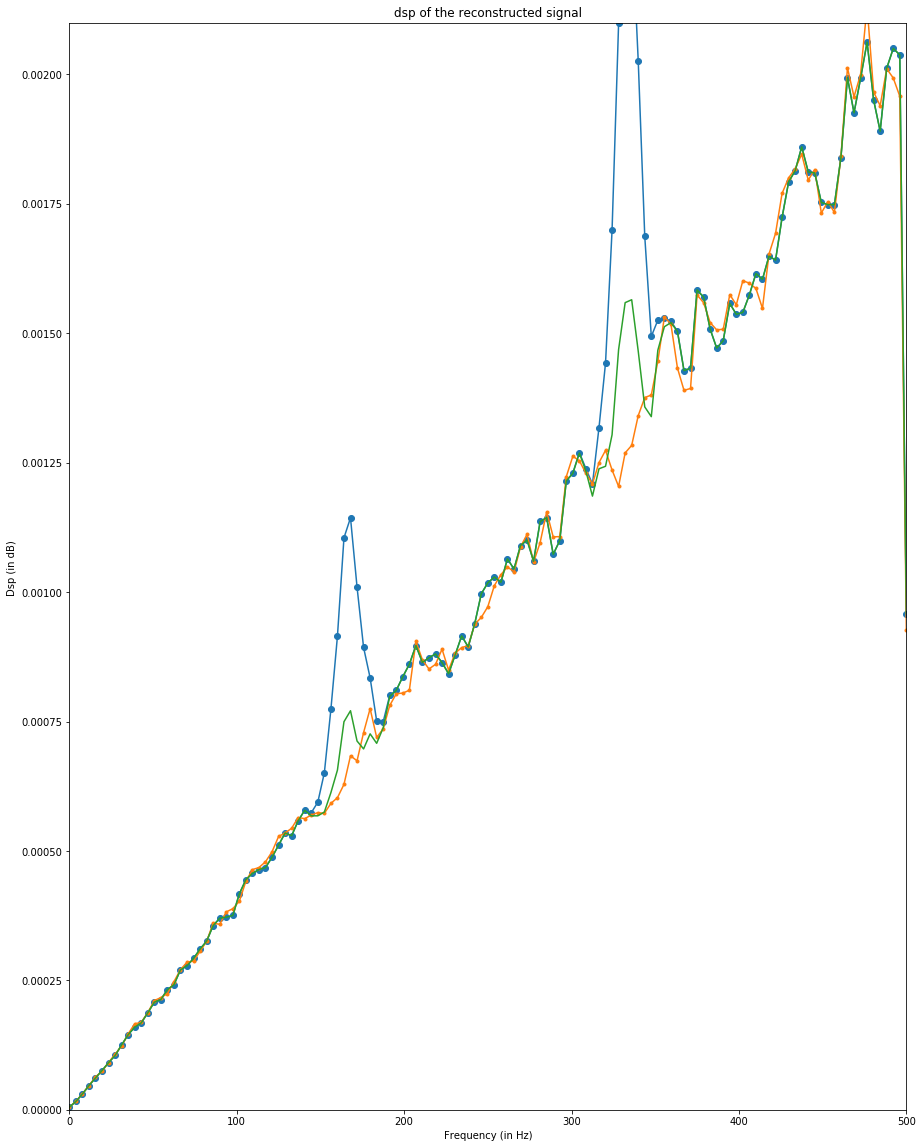

In [26]:
delta=4
plt.figure(figsize = (15, 20))

h1 = signal.firwin(numtaps, f1+delta, window='blackman',pass_zero=True,scale=False, nyq=0.5*Fs)
h2 = signal.firwin(numtaps, [f1-delta,f2+delta], window='blackman',pass_zero=False,scale=False, nyq=0.5*Fs)
h3 = signal.firwin(numtaps, f2-delta, window='blackman',pass_zero=False,scale=False, nyq=0.5*Fs)
SIGrec=np.convolve(h1,SIG1u)+np.convolve(h2,SIG2u)+np.convolve(h3,SIG3u)


f, Pss_denrec = signal.welch(SIGrec, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.plot(f,Pss_denrec,'o-')
                            # plot the square root of the psd (between 0 and Fs/2)

plt.axis(axes)
plt.plot(f,Pss_den1+Pss_den2+Pss_den3,'.-')
delta=1
h1 = signal.firwin(numtaps, f1+delta, window='blackman',pass_zero=True,scale=False, nyq=0.5*Fs)
h2 = signal.firwin(numtaps, [f1-delta,f2+delta], window='blackman',pass_zero=False,scale=False, nyq=0.5*Fs)
h3 = signal.firwin(numtaps, f2-delta, window='blackman',pass_zero=False,scale=False, nyq=0.5*Fs)
SIGrec=np.convolve(h1,SIG1u)+np.convolve(h2,SIG2u)+np.convolve(h3,SIG3u)
f, Pss_denrec = signal.welch(SIGrec, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.plot(f,Pss_denrec)
plt.title('dsp of the reconstructed signal')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Dsp (in dB) ')



## Simple 2 band perfect reconstruction filter


In [27]:

# the simple perfect reconstruction filters

h1=[1, 1]/np.sqrt(2)
h2=[1, -1]/np.sqrt(2)
g1=[1, 1]/np.sqrt(2)
g2=[-1, 1]/np.sqrt(2)

# perform the convolution at the analysis side
x1=np.convolve(h1,SIG)
x2=np.convolve(h2,SIG)

# downsample
x1d=x1[0::2]
x2d=x2[0::2]

# upsample
x1u=x1;x2u=x2
x1u[1::2]=0
x2u[1::2]=0

# perform the convolution at the synthesis side
y1=np.convolve(g1,x1)
y2=np.convolve(g2,x2)

# add the signals
SIGrec=y1+y2

# Check there is a simple delay
print(SIG[0:10])
print(SIGrec[0:10])


[-0.01033428  0.72136798 -0.43935687  0.56509603 -1.44937531 -0.04339452
 -0.59811477  1.69752729  0.29503764 -0.11156709]
[ 0.         -0.01033428  0.72136798 -0.43935687  0.56509603 -1.44937531
 -0.04339452 -0.59811477  1.69752729  0.29503764]


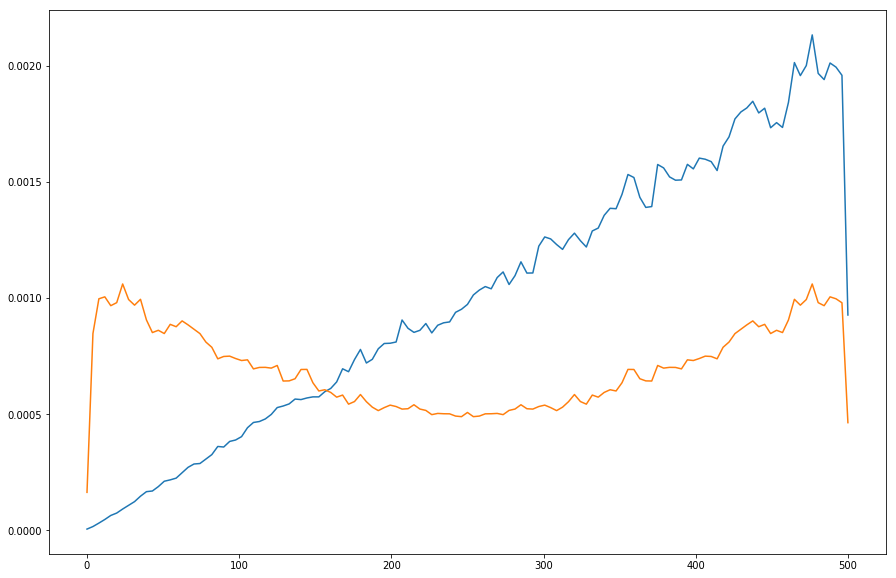

In [28]:
plt.figure(figsize = (15, 10))


f, Pss_denx1 = signal.welch(SIG, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
f, Pss_denx2 = signal.welch(x2, Fs,nperseg=seg_length)
                            # compute the power spectral density with the Welch Method
plt.plot(f,Pss_denx1)
plt.plot(f,Pss_denx2)
